Лабораторна робота №8, Зомолта Ясира Анваровича, ФІТ 4-8

#1.

1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


2)

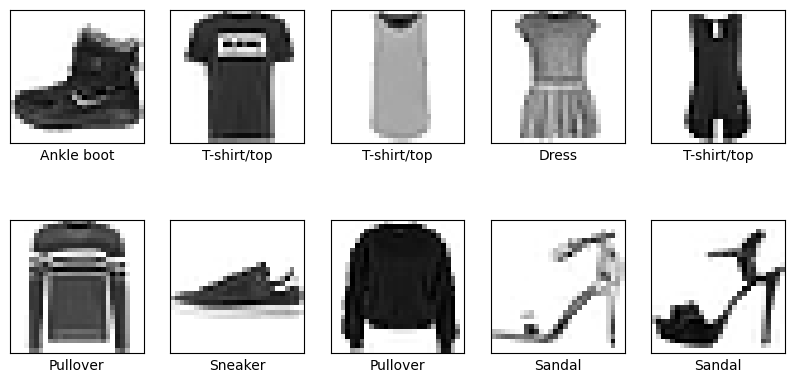

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

3)

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

4)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

6)

In [ ]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_cnn_model.h5')

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6889 - loss: 0.8543 - val_accuracy: 0.8492 - val_loss: 0.3999 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8572 - loss: 0.4031 - val_accuracy: 0.8826 - val_loss: 0.3225 - learning_rate: 0.0010
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8785 - loss: 0.3388 - val_accuracy: 0.8857 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8924 - loss: 0.2959 - val_accuracy: 0.8992 - val_loss: 0.2817 - learning_rate: 0.0010
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9027 - loss: 0.2689 - val_accuracy: 0.8995 - val_loss: 0.2779 - learning_rate: 0.0010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9063 - loss: 0.2522 - val_accuracy: 0.9025 - val_loss: 0.2681 - learning_rate: 0.0010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9107 - l

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


7)

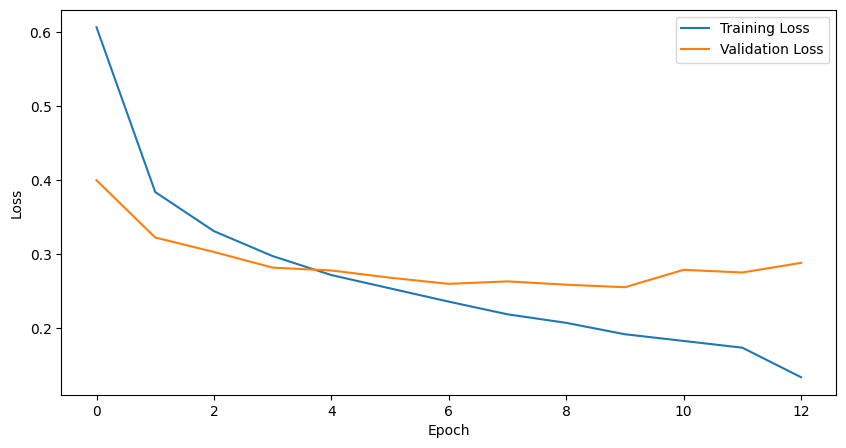

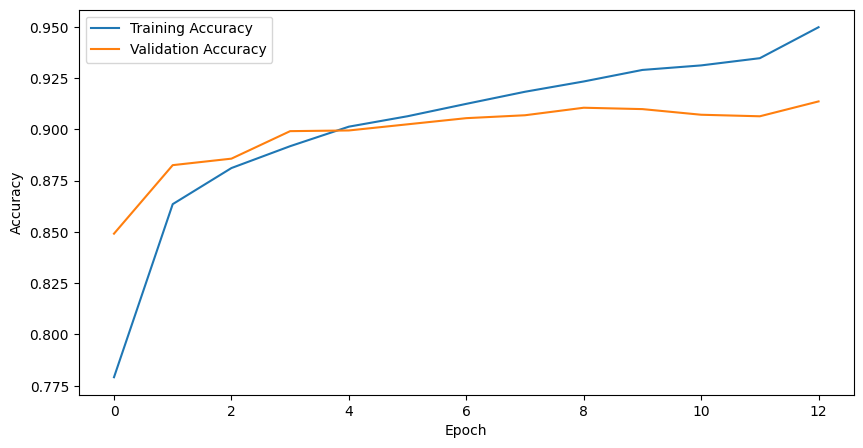

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8)

In [ ]:
test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.86      0.87      0.87      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.76      0.70      0.73      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



9)

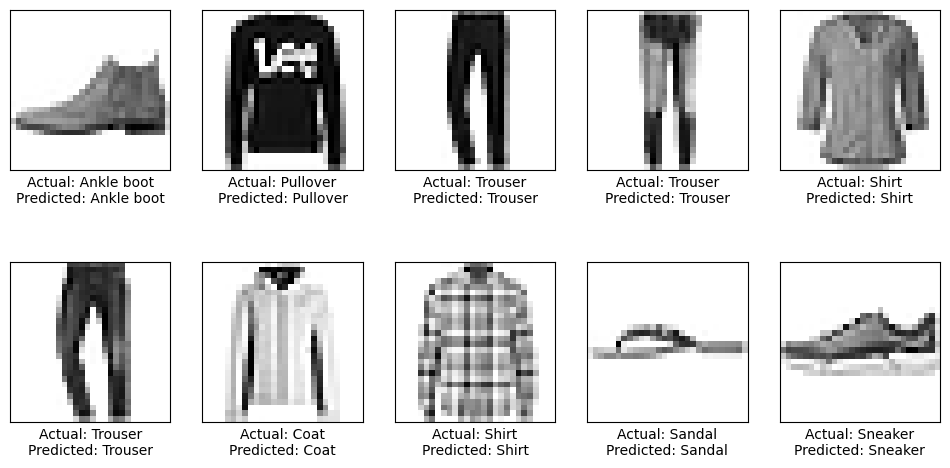

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {class_names[test_labels[i]]}\nPredicted: {class_names[predicted_classes[i]]}")
plt.show()

2.

Trial 30 Complete [00h 00m 52s]
val_accuracy: 0.8694999814033508

Best val_accuracy So Far: 0.9104166626930237
Total elapsed time: 00h 14m 14s
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7463 - loss: 0.6835 - val_accuracy: 0.8589 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8819 - loss: 0.3253 - val_accuracy: 0.8972 - val_loss: 0.2876 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8979 - loss: 0.2685 - val_accuracy: 0.8845 - val_loss: 0.3173 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9145 - loss: 0.2306 - val_accuracy: 0.9050 - val_loss: 0.2587 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9244 - loss: 0.2027 - val_accuracy: 0.9020 - val_loss: 0.2809 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9348 - loss: 0.1756

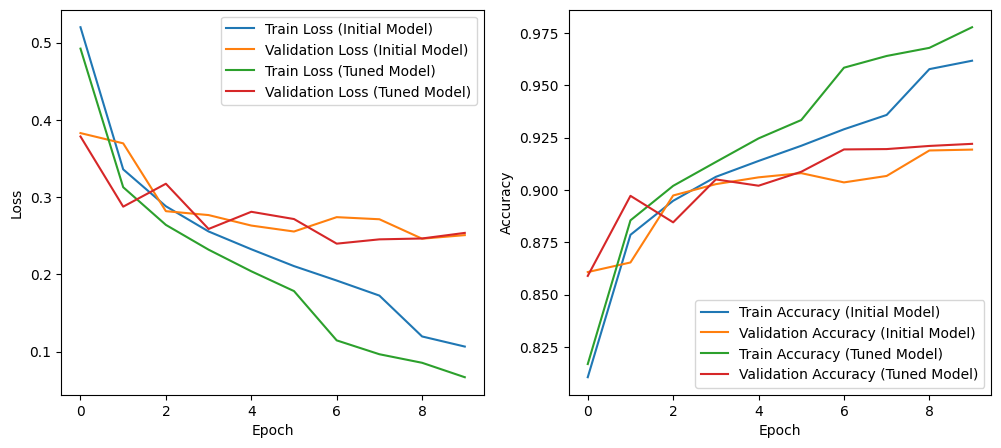

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for Initial Model:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.89      0.88      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.70      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Classification Report for Tuned Model:
              precision    recall  f1-score   support

 T-shirt/top       0.86

In [ ]:
!pip install keras-tuner -q

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import Hyperband
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

initial_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

initial_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history = initial_model.fit(
    x_train, y_train, epochs=10,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3), ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)]
)

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), activation='relu'
    ))
    model.add(layers.Flatten())

    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = Hyperband(
build_model,
objective='val_accuracy',
max_epochs=10,
directory='fashion_mnist_tuning',
project_name='fashion_mnist'
)

stop_early = EarlyStopping(monitor='val_loss', patience=3)

tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

history_tuned = model.fit(
    x_train, y_train, epochs=10, validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3), ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)]
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (Initial Model)')
plt.plot(history.history['val_loss'], label='Validation Loss (Initial Model)')
plt.plot(history_tuned.history['loss'], label='Train Loss (Tuned Model)')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss (Tuned Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy (Initial Model)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Initial Model)')
plt.plot(history_tuned.history['accuracy'], label='Train Accuracy (Tuned Model)')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy (Tuned Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred_initial = np.argmax(initial_model.predict(x_test), axis=1)
y_pred_tuned = np.argmax(model.predict(x_test), axis=1)

print("Classification Report for Initial Model:")
print(classification_report(y_test, y_pred_initial, target_names=class_names))

print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned, target_names=class_names))